In [12]:
from halp.directed_hypergraph import DirectedHypergraph

from halp.algorithms.directed_paths import shortest_b_tree
import networkx as nx

In [4]:
# Define directed hypergraph from overleaf example
H = DirectedHypergraph()
H.add_hyperedge([1], [2, 3]) #, label="E1")
H.add_hyperedge([2], [4, 5]) #, label="E2")
H.add_hyperedge([2,3], [6, 7]) #, label="E3")
H.add_hyperedge([5, 6], [10]) #, label="E4")
H.add_hyperedge([8, 9, 10], [4]) #, label="E5")
H.add_hyperedge([11], [12]) #, label="E6")
H.add_hyperedge([12, 13], [11]) #, label="E7")

'e7'

# Demonstration SBT Algorithm

In [5]:
id_source_vertex = 1
mapping, weight_dict = shortest_b_tree(H, id_source_vertex)

In [7]:
# mapping: dict: keys (int): vertices ids, values (strings): id of the last hyperedge on the shortest B-path that connects id_source_vertex and the key.
print(mapping)

{1: None, 2: 'e1', 3: 'e1', 4: 'e2', 5: 'e2', 6: 'e3', 7: 'e3', 8: None, 9: None, 10: 'e4', 11: None, 12: None, 13: None}


In [8]:
# weight_dict: dict: keys (int): vertices ids, values (int): weight that the SBT algorithm assigns to each vertex.
print(weight_dict)

{1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 3, 8: inf, 9: inf, 10: 6, 11: inf, 12: inf, 13: inf}


# Extract Tree for HLD Algorithm

In [9]:
def calculate_tree(id_source_vertex: int):
    """
    Calculates the tree that we want to input in the HLD PathGES algorithm.
    Parameters:
        id_source_vertex (int): The id of the source vertex.
    """

    # Runs the SBT algorithm for vertex "id_source_vertex" as source.
    mapping, weight_dict = shortest_b_tree(H, id_source_vertex)
    # mapping: dict: keys (int): vertices ids, values (strings): id of the last hyperedge on the shortest B-path that connects id_source_vertex and the key.
    # weight_dict: dict: keys (int): vertices ids, values (int): weight that the SBT algorithm assigns to each vertex.

    # Tree that we will input in the HLD PathGES algorithm.
    tree = nx.DiGraph()
    for vertex_id in mapping.keys():
        hyperedge_id = mapping[vertex_id]
        if hyperedge_id is None:
            continue

        tail_vertex_id_list = H.get_hyperedge_tail(hyperedge_id)
        weight_tail_nodes = [weight_dict[vertex_id] for vertex_id in tail_vertex_id_list]
        node_id_maximal_weight = tail_vertex_id_list[weight_tail_nodes.index(max(weight_tail_nodes))]

        tree.add_edge(node_id_maximal_weight, vertex_id)

    return tree

In [10]:
def draw_tree(tree, id_source_vertex):
    colors = ['red' if node == id_source_vertex else 'lightblue' for node in tree.nodes()]
    nx.draw(tree, with_labels=True, node_color=colors)

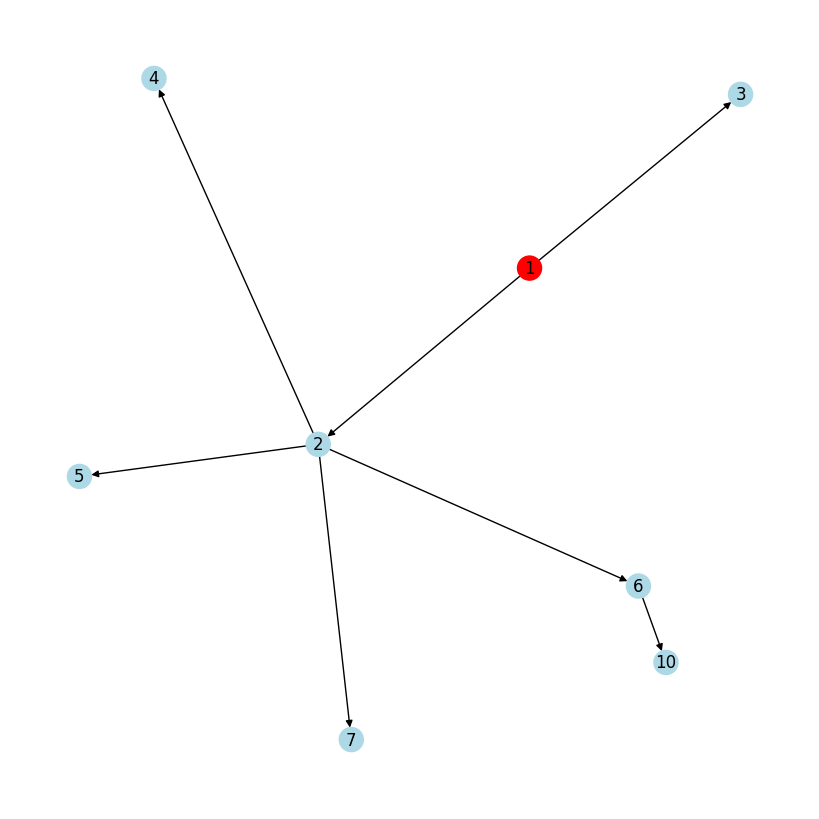

In [11]:
id_source_vertex = 1
tree = calculate_tree(id_source_vertex)
draw_tree(tree, id_source_vertex)